In [2]:
import pandas as pd
import numpy as np
import os

#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil

#To get plots with better resolution 
%config InlineBackend.figure_format = 'retina'

#K-Means Clustering
from os.path import join
import matplotlib.cm as cm
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans

sns.set()

#K-Mode Clustering
!pip install kmodes
from kmodes.kmodes import KModes

#Hierarchical Clustering
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

## Import preprocessed data

In [7]:
df = pd.read_csv(join('..', 'Projeto DM', 'DM_project_preprocessed.csv'))

In [9]:
#Check info again 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14773 entries, 0 to 14772
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         14773 non-null  float64
 1   Gender                      14773 non-null  int64  
 2   Income                      14773 non-null  float64
 3   DaysWithoutFrequency        14773 non-null  float64
 4   LifetimeValue               14773 non-null  float64
 5   UseByTime                   14773 non-null  int64  
 6   AthleticsActivities         14773 non-null  int64  
 7   WaterActivities             14773 non-null  int64  
 8   FitnessActivities           14773 non-null  int64  
 9   TeamActivities              14773 non-null  int64  
 10  RacketActivities            14773 non-null  int64  
 11  CombatActivities            14773 non-null  int64  
 12  SpecialActivities           14773 non-null  int64  
 13  OtherActivities             147

In [11]:
df.columns

Index(['Age', 'Gender', 'Income', 'DaysWithoutFrequency', 'LifetimeValue',
       'UseByTime', 'AthleticsActivities', 'WaterActivities',
       'FitnessActivities', 'TeamActivities', 'RacketActivities',
       'CombatActivities', 'SpecialActivities', 'OtherActivities',
       'NumberOfFrequencies', 'AttendedClasses', 'AllowedWeeklyVisitsBySLA',
       'AllowedNumberOfVisitsBySLA', 'RealNumberOfVisits', 'NumberOfRenewals',
       'HasReferences', 'NumberOfReferences', 'Dropout', 'AgeGroups',
       'TotalTimeOfEnrollment', 'TimeSinceLastVisit', 'RecentActivityPeriod',
       'AverageVisitFrequency'],
      dtype='object')

In [10]:
#Check metric and non metric features again
print("These are the non metric features:", non_metric_features)
print("These are the metric features:", metric_features)

NameError: name 'non_metric_features' is not defined

# 4. Clustering

## 4.1. K-Means Clustering

##### For metric features:

In [83]:
kmclust = KMeans(n_clusters=8,  #default, see scikit learn
                 init='random',      #in a random way
                 n_init=10,       #pick 10 possible sets of 8 centroids
                 random_state=1)   #whatever the number we want, the random 8 points, will always be the same random 8 points - pseudo random
                                       #will be a different set of 8, if we don't use the random  state

In [84]:
# the fit method, only on metric
kmclust.fit(df3_scaled[metric_features])

KMeans(init='random', n_init=10, random_state=1)

In [85]:
# the transform method
pd.DataFrame(kmclust.transform(df3_scaled[metric_features]))

,0,1,2,3,4,5,6,7
0,1.286737,1.148532,0.651263,0.978291,0.938763,1.363152,0.928125,0.373414
1,0.319775,0.907186,1.237530,1.151410,0.944510,0.978562,1.016289,1.222489
2,0.983841,0.926185,0.386932,0.881299,0.572961,1.221782,0.339728,0.700954
3,0.571345,0.510141,1.017929,1.223708,0.987507,0.895553,1.167576,1.229206
4,1.088624,1.082562,0.692001,0.386919,0.774845,1.059232,0.654209,0.601550
...,...,...,...,...,...,...,...,...
14768,1.004539,0.606155,0.849637,0.899645,1.123473,0.446698,1.106452,1.013963
14769,0.981050,1.067347,0.608460,0.863953,0.567120,1.289404,0.257613,0.707189
14770,0.994115,0.943339,0.437196,0.910404,0.596746,1.236931,0.361339,0.759596
14771,1.033813,0.838678,1.002481,1.062080,1.212673,0.829528,1.203376,0.779814


##### Improve the initialization step

In [86]:
# Better initialization method and provide more n_init
kmclust = KMeans(n_clusters=8, 
                 init='k-means++',  
                 n_init=15, 
                 random_state=1)

kmclust.fit(df3_scaled[metric_features])

#init='k-means++' initializes the centroids to be (generally) distant from each other, leading to probably better results than random initialization. n_init=K allows to initialize KMeans K times and pick the best clustering in terms of Inertia

KMeans(n_init=15, random_state=1)

In [87]:
kmclust.predict(df3_scaled[metric_features])

#row 0 is cluster nr 4, row 1 is cluster nr 2,...

array([4, 2, 0, ..., 0, 4, 6])

##### Defining the number of clusters

In [88]:
range_clusters = range(1, 11)

inertia = []
for n_clus in range_clusters:  # iterate over desired ncluster range
    kmclust = KMeans(n_clusters=n_clus, 
                     init='k-means++', 
                     n_init=15, 
                     random_state=1)
    kmclust.fit(df3_scaled[metric_features])
    inertia.append(kmclust.inertia_)  # save the inertia of the given cluster solution

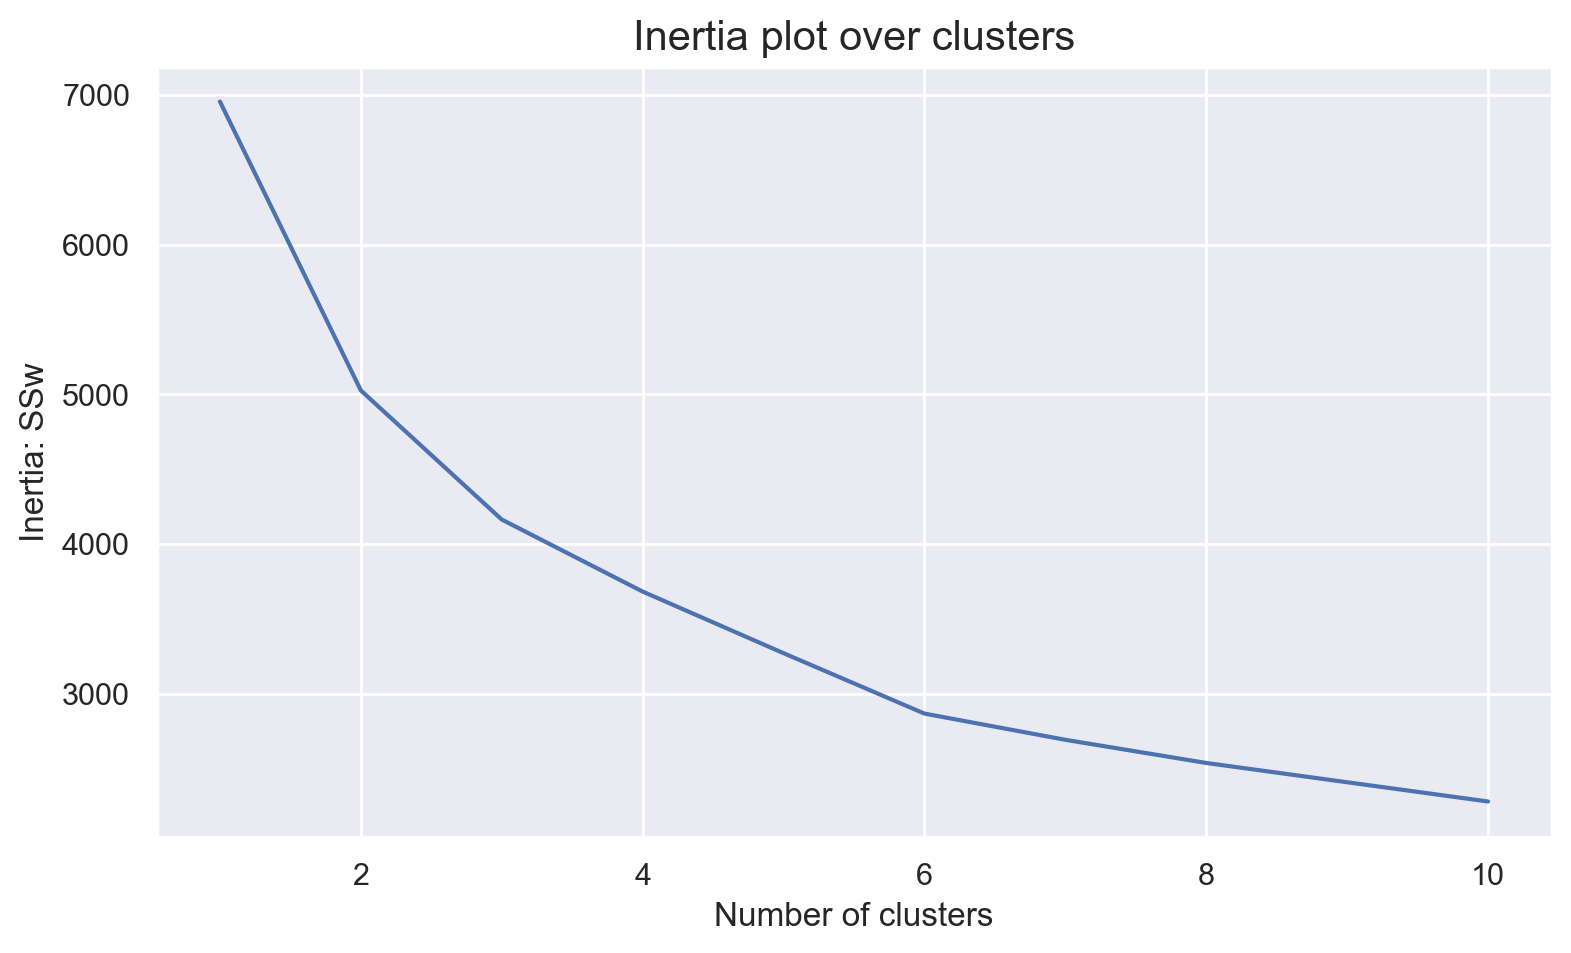

In [89]:
# The inertia plot
plt.figure(figsize=(9,5))
plt.plot(range_clusters, inertia)
plt.ylabel("Inertia: SSw")
plt.xlabel("Number of clusters")
plt.title("Inertia plot over clusters", size=15)
plt.show()

#the lower the inertia the better, the smallest SSw of the centroids - but is too much clusters 
#identify the elbow - 6

In [ ]:
# Storing average silhouette metric
avg_silhouette = []
for nclus in range_clusters:
    # Skip nclus == 1 - WE NEED AT LEAST 2 CLUSTERS
    if nclus == 1:  
        continue
    
    # Create a figure
    fig = plt.figure(figsize=(13, 7))

    # Initialize the KMeans object with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    kmclust = KMeans(n_clusters=nclus, init='k-means++', n_init=15, random_state=1)
    cluster_labels = kmclust.fit_predict(df3_scaled[metric_features])

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(df3_scaled[metric_features], cluster_labels)
    avg_silhouette.append(silhouette_avg)
    print(f"For n_clusters = {nclus}, the average silhouette_score is : {silhouette_avg}")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df3_scaled[metric_features], cluster_labels)

    y_lower = 10
    for i in range(nclus):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        
        # Get y_upper to demarcate silhouette y range size
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        # Filling the silhouette
        color = cm.nipy_spectral(float(i) / nclus)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    plt.title("The silhouette plot for the various clusters.")
    plt.xlabel("The silhouette coefficient values")
    plt.ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    
    # The silhouette coefficient can range from -1, 1
    xmin, xmax = np.round(sample_silhouette_values.min() -0.1, 2), np.round(sample_silhouette_values.max() + 0.1, 2)
    plt.xlim([xmin, xmax])
    
    # The (nclus+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    plt.ylim([0, len(df3_scaled[metric_features]) + (nclus + 1) * 10])

    plt.yticks([])  # Clear the yaxis labels / ticks
    plt.xticks(np.arange(xmin, xmax, 0.1))

For n_clusters = 2, the average silhouette_score is : 0.34323235257961193


In [ ]:
# The average silhouette plot
# The inertia plot
plt.figure(figsize=(9,5))
plt.plot(range_clusters[1:], ## Plot X-axis; Why range_clusters[1:] ? Remember we skipped k=1 in the cell above
         avg_silhouette)     ## Plot Y-axis

plt.ylabel("Average silhouette")
plt.xlabel("Number of clusters")
plt.title("Average silhouette plot over clusters", size=15)
plt.show()

##### Apart from the 2 cluster option, the 6 clusters is the one with the highest inertia, so we will continue with this number of clusters. It was also one of the best options according to the silhouette plots above.

##### Final K-Means clustering solution

In [ ]:
# final cluster solution
number_clusters = 6
kmclust = KMeans(n_clusters=number_clusters, init='k-means++', n_init=15, random_state=1)
kmeans_labels = kmclust.fit_predict(df3_scaled[metric_features])
kmeans_labels

In [ ]:
# Characterizing the final clusters
df3_concat_kmean = pd.concat((df3_scaled, pd.Series(kmeans_labels, name='labels', index=df3_scaled.index)), axis=1)
df3_concat_kmean.groupby('labels').mean()

In [ ]:
cluster_means = df3_concat_kmean.groupby('labels').mean()[metric_features].T
cluster_means.style.format(precision=2).background_gradient(axis=1)

## 4.2. K-Mode Clustering

##### For categorical features:

##### Test with the 3 possible values for init: "Huang", "Cao" and "random"

In [ ]:
#HUANG

# Elbow curve to find optimal K 
cost = [] 
K = range(1,5) 

for k in list(K): 
    kmode_huang = KModes(n_clusters=k, 
                   init = "Huang",
                   n_init = 5, 
                   verbose=1) 
    
    kmode_huang.fit_predict(df3_scaled[non_metric_features]) 
    cost.append(kmode_huang.cost_) 

# Cost plot
plt.plot(K, cost, 'x-') 
plt.xlabel('No. of clusters') 
plt.ylabel('Cost') 
plt.title('Elbow Curve') 
plt.show()

In [ ]:
silhouette_huang = silhouette_score(df3_scaled[non_metric_features], kmode_huang.labels_)
silhouette_huang 

In [ ]:
#RANDOM

# Elbow curve to find optimal K 
cost = [] 
K = range(1,5) 

for k in list(K): 
    kmode_random = KModes(n_clusters=k, 
                   init = "random",
                   n_init = 5, 
                   verbose=1) 
    
    kmode_random.fit_predict(df3_scaled[non_metric_features]) 
    cost.append(kmode_random.cost_) 

# Cost plot
plt.plot(K, cost, 'x-') 
plt.xlabel('No. of clusters') 
plt.ylabel('Cost') 
plt.title('Elbow Curve') 
plt.show()

In [ ]:
silhouette_random = silhouette_score(df3_scaled[non_metric_features], kmode_random.labels_)
silhouette_random 

In [ ]:
#CAO 

# Elbow curve to find optimal K 
cost = [] 
K = range(1,5) 

for k in list(K): 
    kmode_cao = KModes(n_clusters=k, 
                   init = "Cao",
                   n_init = 5, 
                   verbose=1) 
    
    kmode_cao.fit_predict(df3_scaled[non_metric_features]) 
    cost.append(kmode_cao.cost_) 

# Cost plot
plt.plot(K, cost, 'x-') 
plt.xlabel('No. of clusters') 
plt.ylabel('Cost') 
plt.title('Elbow Curve') 
plt.show()

In [ ]:
silhouette_cao = silhouette_score(df3_scaled[non_metric_features], kmode_cao.labels_)
silhouette_cao

In [ ]:
# The one with the highest silhouette score is the one using "random". ???? DUVIDA

In [ ]:
# Considering the 2 plot solution

kmode = KModes(n_clusters=2, init = "random", n_init = 5, verbose=1) 
kmode_labels = kmode.fit_predict(df3_scaled[non_metric_features]) 
kmode_labels

In [ ]:
# Characterizing the final clusters
df3_concat_kmode = pd.concat((df3_scaled, pd.Series(kmode_labels, name='labels', index=df3_scaled.index)), axis=1)
df3_concat_kmode.groupby('labels').mean()

In [ ]:
cluster_means_kmode = df3_concat.groupby('labels').mean()[non_metric_features].T
cluster_means_kmode.style.format(precision=2).background_gradient(axis=1)

## 4.3. Hierarchical Clustering

##### Combine K-Modes and K-Means, using Hierarchical Clustering

In [ ]:
# Combine K-Modes and K-Means labels into a single matrix
combined_labels_matrix = np.column_stack((kmode_labels, kmeans_labels))

# Apply hierarchical clustering
hierarchical_clusters = linkage(combined_labels_matrix, method='ward')

# Determine the number of clusters using a distance threshold or another method
num_clusters = 15  # Adjust based on your analysis

# Assign instances to clusters based on the hierarchical clustering results
combined_labels_hierarchical = fcluster(hierarchical_clusters, num_clusters, criterion='maxclust')

# Combine the original DataFrame with the combined labels
df3_scaled_combined = pd.concat([df3_scaled, pd.Series(combined_labels_hierarchical, name='Combined_Labels')], axis=1)

In [ ]:
# See the results
cluster_means_combined = df3_scaled_combined.groupby('Combined_Labels').mean()
cluster_means_combined

In [ ]:
# Reset the index if needed
cluster_means_combined_reset = cluster_means_combined.reset_index()
cluster_means_combined_reset

In [ ]:
# Assuming 'cluster_means_combined' is your DataFrame
# Assuming cluster labels are in the index

# Drop the cluster label index before clustering
features_only = cluster_means_combined_reset.drop('Combined_Labels', axis=1)

# Perform hierarchical clustering
linkage_matrix = linkage(features_only, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, labels=cluster_means_combined.index, orientation='top', leaf_rotation=45)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Clusters')
plt.ylabel('Distance')
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist, squareform

In [ ]:
#ANOTHER WAY

#1. Perform hierarchical clustering
# Specify linkage method and number of clusters (None for automatic selection)
ward_linkage = AgglomerativeClustering(n_clusters=15, linkage='ward')

# Fit the hierarchical clustering model to the data
ward_labels = ward_linkage.fit_predict(df3_scaled)

In [ ]:
#2. Determine the number of clusters
# Calculate pairwise distances
distance_matrix = pdist(df3_scaled)
distance_matrix = squareform(distance_matrix)

# Generate hierarchical clustering linkage matrix
linkage_matrix = ward_linkage.fit(distance_matrix)

# Determine the number of clusters using the dendrogram
number_of_clusters = fcluster(linkage_matrix, t=0.7 * max(linkage_matrix[:, 2]), criterion='distance')

In [ ]:
#3. Combining K-means and K-modes Clustering
hierarchical_clusters = []

for i in range(1, number_of_clusters + 1):
    cluster_indices = np.where(ward_labels == i)[0]
    hierarchical_clusters.append(df3_scaled[cluster_indices])

In [ ]:
kmeans_clusters = []

for cluster in hierarchical_clusters:
    # Apply K-means clustering to numerical variables
    kmeans = KMeans(n_clusters=3)
    kmeans.fit(cluster[:, numerical_indices])
    kmeans_labels = kmeans.predict(cluster[:, numerical_indices])

    # Apply K-modes clustering to categorical variables
    kmodes = KModes(n_clusters=3, init='Huang', verbose=1)
    kmodes.fit(cluster[:, categorical_indices], kmeans_labels)

    # Combine numerical and categorical cluster labels
    combined_labels = np.concatenate((kmeans_labels.reshape(-1, 1), kmodes.labels_.reshape(-1, 1)), axis=1)

    # Create the final cluster
    final_cluster = []
    for i, label in enumerate(combined_labels):
        final_cluster.append(cluster[i])

    kmeans_clusters.append(final_cluster)

In [ ]:
#4. Evaluate clustering results
silhouette_scores = []

for cluster in kmeans_clusters:
    silhouette_score_cluster = silhouette_score(cluster)
    silhouette_scores.append(silhouette_score_cluster)

print("Average silhouette score:", np.mean(silhouette_scores))